# ML PROJECT: SOLDIER RACE PREDICTION

<img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY" style="display:block; margin:auto; border:0px solid red;" width=50% height='250'/>

<p style="background-color:romance; color:plum; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bold; font-size:220%; line-height:1.4; text-transform: uppercase;">WAY TO REINVENT YOURSELF</p>

<img src="https://storage.googleapis.com/kaggle-datasets-images/504308/932986/ef38c9d738d2e0dbeec85212f90c608e/dataset-cover.png?t=2020-02-09-00-36-15" style="display:block; margin:auto; border:1px solid LightGrey;" width=65% height='250'/>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bolder; font-size:3em; line-height:1.4; text-transform:capitalize;"><strong>US Army Anthropometric Working Databases (ANSUR II)</strong></p>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:normal; font-size:2em; line-height:1.4; text-transform:capitalize;">Multi-Class Classification problems with EDA</p> 

<basefont size="2" face ="arial, verdana, sans-serif" color="jaguar">

**WELCOME!**

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

**Determines**

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

<a id="0">**TASKS**</a>

01. Exploratory Data Analysis (EDA)
    - Import Libraries, Load Dataset, Exploring Data
      1. *i. Import Libraries*
      2. *ii. Ingest Data*
      3. *iii. Explore Data*
      4. *iv. Outlier Detection*
      5. *v.  Drop unnecessary features*
02. Data Preprocessing
    + Scale (if needed)
    + Separete the data frame for evaluation purposes
03. Multi-class Classification
    * Import libraries
    * Implement SVM Classifer
    * Implement Decision Tree Classifier
    * Implement Random Forest Classifer
    * Implement XGBoost Classifer
    * Compare The Models

<a id="1"></a>

# EDA

<!-- <a href="#0" class="btn btn-primary btn-sm" role="button" aria-pressed="true" data-toggle="popover" style="background-color:DarkOrange; color:White;">**Tasks**</a> -->

- Drop unnecessary colums
- Drop **DODRace** class if **`value count below 500`** (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [120]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [121]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'b',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [122]:
df_m = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')
df_f= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

In [123]:
df_female = df_f.copy()
df_female.head(2)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand


In [124]:
df_male = df_m.copy()
df_male.head(2)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand


In [127]:
df_female.shape, df_male.shape

((1986, 108), (4082, 108))

In [128]:
df_female.info(), print(), df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


(None, None, None)

## Explore Data

### If needed, rename the columns' names for easy use. 

In [129]:
df_female.isnull().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [130]:
df_male.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [131]:
df_male.drop(columns='subjectid', inplace=True)
df_female.drop(columns='SubjectId', inplace=True)

In [132]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

In [134]:
df.shape

(6068, 107)

In [137]:
from skimpy import clean_columns

df = clean_columns(df)
df.head(3).T

0 column names have been cleaned

,0,1,2
abdominalextensiondepthsitting,266,233,287
acromialheight,1467,1395,1430
acromionradialelength,337,326,341
anklecircumference,222,220,230
axillaheight,1347,1293,1327
balloffootcircumference,253,245,256
balloffootlength,202,193,196
biacromialbreadth,401,394,427
bicepscircumferenceflexed,369,338,408
bicristalbreadth,274,257,261


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 107 entries, abdominalextensiondepthsitting to writing_preference
dtypes: int64(98), object(9)
memory usage: 5.0+ MB


In [141]:
df.isnull().sum()

abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth                           0
chestheight              

In [142]:
df.dod_race.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dod_race, dtype: int64

In [143]:
df = df[df.dod_race < 4]

# We keep the data where dod_race is only 1, 2 or 3 and drop the rest.

In [144]:
df['dod_race'].isnull().sum()

0

### Drop unnecessary or repeating columns

In [146]:
df = df.drop(columns=['date','installation','component','branch','primary_mos','subjects_birth_location', "ethnicity",'writing_preference'  ])

In [147]:
df.reset_index

<bound method DataFrame.reset_index of       abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  

In [99]:
df.shape

(5769, 100)

In [100]:
df.isnull().sum().sum()

0

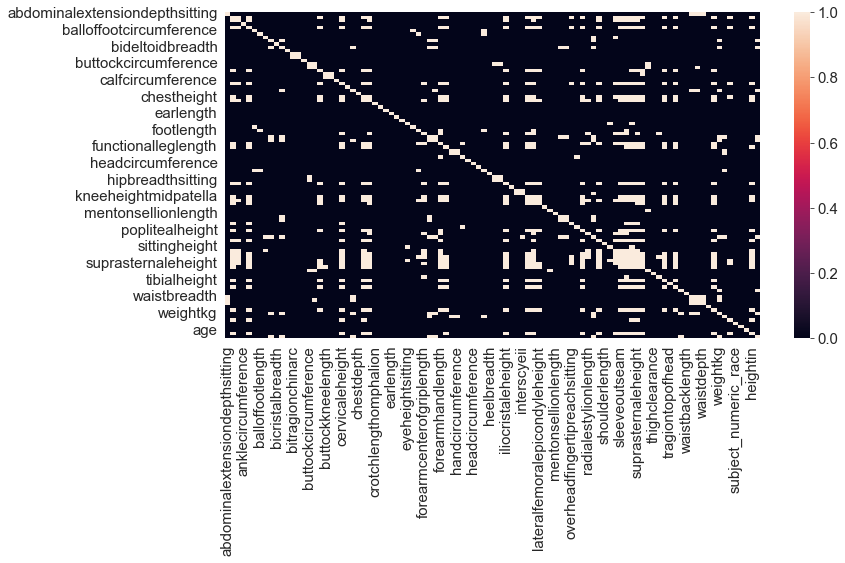

In [101]:
sns.heatmap(df.corr() > 0.85)
plt.show()

### Check if there are some dublicate rows or not. If there are, then drop them.

In [102]:
df.duplicated().sum()

0

### Checking columns with missing values

You can extract rows/columns containing missing values from pandas.DataFrame by using the ``isnull()`` or ``isna()`` method that checks if an element is a missing value. Then, you can use the ``dropna()`` method to extract rows/columns where all elements are non-missing values, i.e., remove rows/columns containing missing values. 

In [103]:
df.isna().any().sum()

0

### Check the distribution of data

In [104]:
df.describe(include="all")

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subject_numeric_race,dod_race,age,heightin,weightlbs,writing_preference
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.00000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,Right hand
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [105]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


Let's check for columns with outliers. If standard deviation is higher than the mean, most probably this feature has outlier values.

In [106]:
df.describe(include='O').T

,count,unique,top,freq
gender,5769,2,Male,3899
writing_preference,5769,3,Right hand,5088


In [108]:
df.describe(include='O').T

,count,unique,top,freq
gender,5769,2,Male,3899


In [109]:
df.head(2).T

,0,1
abdominalextensiondepthsitting,266,233
acromialheight,1467,1395
acromionradialelength,337,326
anklecircumference,222,220
axillaheight,1347,1293
balloffootcircumference,253,245
balloffootlength,202,193
biacromialbreadth,401,394
bicepscircumferenceflexed,369,338
bicristalbreadth,274,257


<AxesSubplot:xlabel='gender,dod_race'>

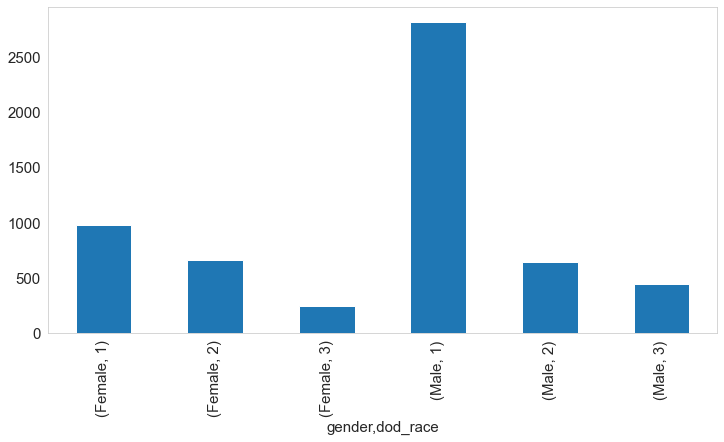

In [110]:
df.groupby("gender").dod_race.value_counts().plot(kind='bar')


In [111]:
df.gender = df["gender"].map({"Male":0,"Female":1}) #mapping the classes to 0 and 1

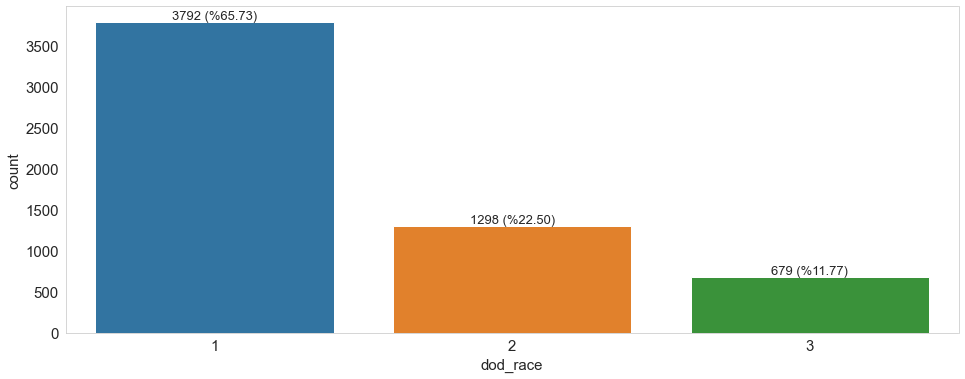

In [112]:
fig, ax = plt.subplots(figsize=(16,6))
# to show the proportion of each class
g = sns.countplot(df["dod_race"])
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h} (%{100*(h/df["dod_race"].count()):0.2f})' if (h:=v.get_height()) > 0 else '' for v in c]
    g.bar_label(c, labels=labels, fontsize=13, rotation=0) 

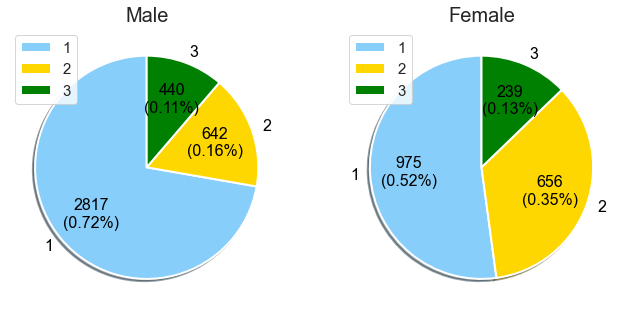

In [113]:
g = df.groupby('gender')['dod_race'].value_counts(normalize=True).sort_index().to_frame().unstack(0).plot.pie(
    subplots=True, layout=(1,2), 
    startangle=90, legend=True,
    shadow=True, figsize=(11,11),
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'w'},
    colors=['LightSkyBlue', 'gold', 'g'],
#     explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.1],
    title=["Male","Female"],
    ylabel= "",
#     labels=['Kecimen', 'Besni'],
    labeldistance=1.1, pctdistance=0.65, 
    autopct=lambda x: '{:.0f}\n{:.2f}%'.format(len(df['dod_race'])*x/100, x), 
#     lambda x: '{:.0f}\n{:.2f}%'.format(len(df['species'])*x/100, x) 
#     "%.1f%%"
#     lambda x: f'{(x/100*len(df['species'])):.0f}\n{x:.2f}%'
)#.legend(loc='best', bbox_to_anchor=(1.0, 0.5)); # Not subplots

data = df.groupby('gender')['dod_race'].value_counts().sort_index().to_frame().unstack(0)
data_per = df.groupby('gender')['dod_race'].value_counts(normalize=True).sort_index().to_frame().unstack(0)
for x, ra in enumerate(g.ravel()):
    index = 1
    for y, te in enumerate(ra.texts):
        if y%2:
            te.set_text(f'{data.iloc[:, x][index].round(2)}\n({data_per.iloc[:, x][index].round(2)}%)')
            index+=1

### Check outliers

All columns are numeric right now, including gender (1 for male, 0 for female).

In [148]:
def get_outliers(col, data=df):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    n_of_rows_above_upper = len(df[df[col] >= upper][col])
    n_of_rows_below_lower = len(df[df[col] <= lower][col])
    tot_n_of_outliers = n_of_rows_above_upper + n_of_rows_below_lower
        
    print('[', col, ']')
    print('Outlier Statistics')
    print('-'*27)
    print("IQR                   : ", iqr)
    print("Q1                    : ", q1)
    print("Q3                    : ", q3)
    print("Upper threshold       : ", upper)
    print("Lower threshold       : ", lower)
    print("N of rows above upper : ", n_of_rows_above_upper)
    print("N of rows below lower : ", n_of_rows_below_lower)
    print("Total N of outliers   : ", tot_n_of_outliers)
#     print('-'*27)
    print(' '*27)
#     print("BoxPlot of", col)
#     sns.boxplot(data=df, x=col)
#     print(' '*27)

In [149]:
for i in df.columns:
    get_outliers(i, df)

[ abdominalextensiondepthsitting ]
Outlier Statistics
---------------------------
IQR                   :  52.0
Q1                    :  220.0
Q3                    :  272.0
Upper threshold       :  350.0
Lower threshold       :  142.0
N of rows above upper :  46
N of rows below lower :  0
Total N of outliers   :  46
                           
[ acromialheight ]
Outlier Statistics
---------------------------
IQR                   :  111.0
Q1                    :  1353.0
Q3                    :  1464.0
Upper threshold       :  1630.5
Lower threshold       :  1186.5
N of rows above upper :  10
N of rows below lower :  4
Total N of outliers   :  14
                           
[ acromionradialelength ]
Outlier Statistics
---------------------------
IQR                   :  28.0
Q1                    :  314.0
Q3                    :  342.0
Upper threshold       :  384.0
Lower threshold       :  272.0
N of rows above upper :  22
N of rows below lower :  13
Total N of outliers   :  35
      

[ sleevelengthspinewrist ]
Outlier Statistics
---------------------------
IQR                   :  84.0
Q1                    :  826.0
Q3                    :  910.0
Upper threshold       :  1036.0
Lower threshold       :  700.0
N of rows above upper :  2
N of rows below lower :  6
Total N of outliers   :  8
                           
[ sleeveoutseam ]
Outlier Statistics
---------------------------
IQR                   :  54.0
Q1                    :  551.0
Q3                    :  605.0
Upper threshold       :  686.0
Lower threshold       :  470.0
N of rows above upper :  10
N of rows below lower :  7
Total N of outliers   :  17
                           
[ span ]
Outlier Statistics
---------------------------
IQR                   :  154.0
Q1                    :  1690.0
Q3                    :  1844.0
Upper threshold       :  2075.0
Lower threshold       :  1459.0
N of rows above upper :  11
N of rows below lower :  9
Total N of outliers   :  20
                           
[ stat

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### Histogram (Histplot)

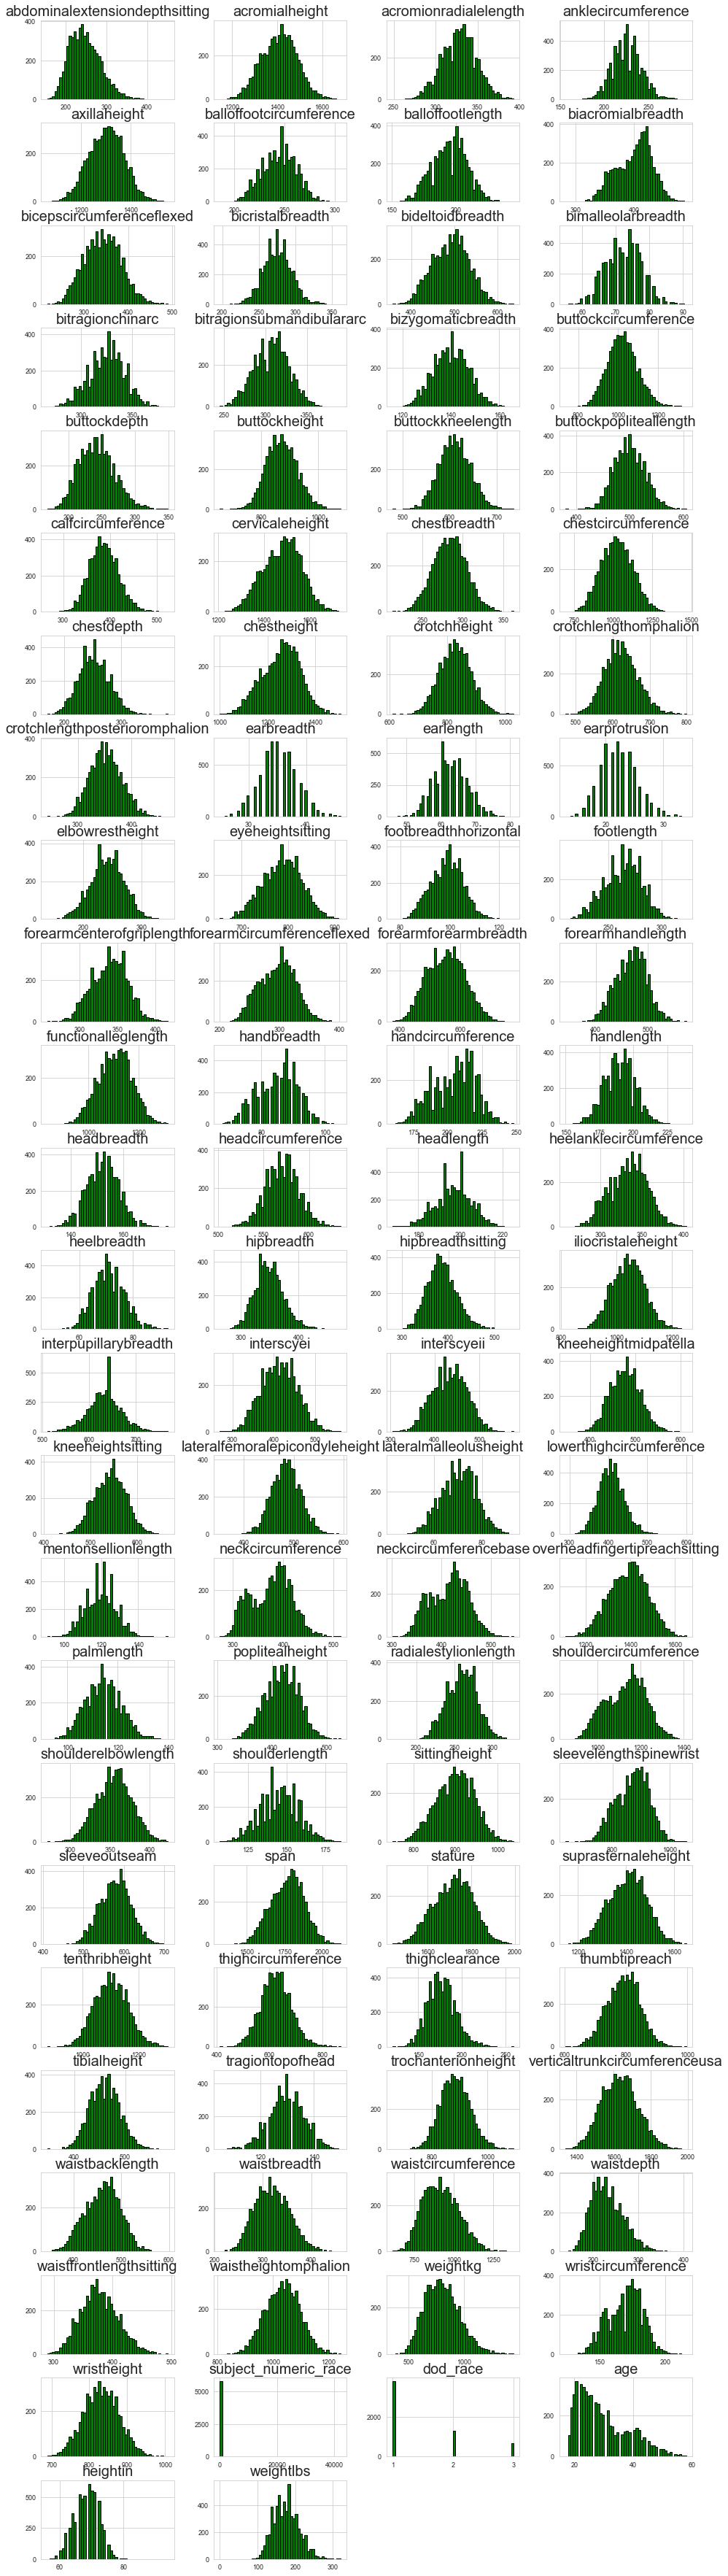

In [150]:
df.hist(figsize=(16, 64), bins=50, 
    layout=(int(np.ceil(len(numeric)/4)), 4),
    xlabelsize=9, ylabelsize=9,
    color="green", edgecolor="black", 
);

  #### Boxplot

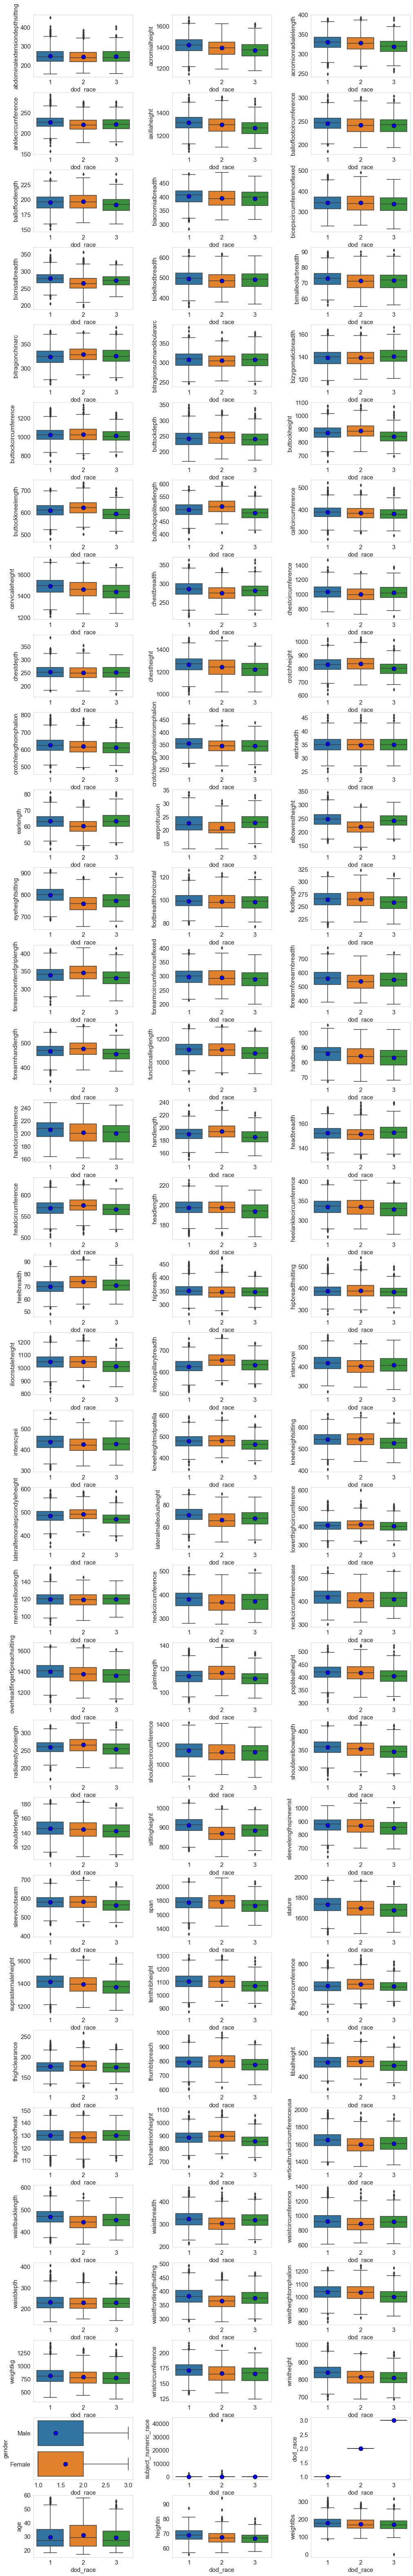

In [151]:
fig = plt.figure(figsize=(16, 48))
plt.subplots_adjust(
    left=0.1, right=0.9,
    top=1.9, bottom=0.1,
    wspace=0.4, hspace=0.25
)
for i, col in enumerate(numeric):
    plt.subplot(int(np.ceil(len(numeric)/3)), 3, i+1)
    sns.boxplot(x='dod_race', y=col, data=df, whis=1.5)

## Correlation

In [152]:
import scipy 

print("Correlation Matrix \n* means p=0.05, ** means p=0.01, **** means p=0.001 ")

correlation = df.corr()
p_value = df.corr(method=lambda x, y: scipy.stats.pearsonr(x, y)[1]) - np.eye(*correlation.shape)
p = p_value.applymap(lambda x: ''.join(['*' for t in [0.05, 0.01, 0.001] if x<=t]))
correlation.round(2).astype(str) + p

Correlation Matrix 
* means p=0.05, ** means p=0.01, **** means p=0.001 


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,subject_numeric_race,dod_race,age,heightin,weightlbs
abdominalextensiondepthsitting,1.0***,0.35***,0.31***,0.52***,0.28***,0.46***,0.33***,0.42***,0.69***,0.51***,0.72***,0.37***,0.53***,0.63***,0.52***,0.74***,0.84***,0.25***,0.48***,0.32***,0.66***,0.34***,0.63***,0.83***,0.78***,0.3***,0.19***,0.46***,0.2***,0.24***,0.4***,0.14***,0.26***,0.28***,0.44***,0.35***,0.35***,0.63***,0.73***,0.31***,0.42***,0.42***,0.46***,0.3***,0.36***,0.36***,0.33***,0.5***,0.44***,0.6***,0.55***,0.26***,0.26***,0.6***,0.54***,0.28***,0.35***,0.22***,0.35***,0.67***,0.29***,0.66***,0.63***,0.32***,0.31***,0.15***,0.28***,0.64***,0.29***,0.19***,0.27***,0.42***,0.28***,0.32***,0.31***,0.35***,0.29***,0.73***,0.72***,0.39***,0.26***,0.19***,0.23***,0.73***,0.57***,0.86***,0.94***,0.96***,0.58***,0.15***,0.83***,0.55***,0.38***,0.02,-0.03*,0.39***,0.29***,0.79***
acromialheight,0.35***,1.0***,0.87***,0.5***,0.99***,0.69***,0.8***,0.73***,0.52***,0.4***,0.63***,0.71***,0.57***,0.58***,0.51***,0.28***,0.34***,0.87***,0.81***,0.75***,0.41***,0.98***,0.54***,0.53***,0.28***,0.96***,0.9***,0.34***,0.41***,0.36***,0.44***,0.28***,0.29***,0.81***,0.67***,0.83***,0.85***,0.64***,0.57***,0.86***,0.89***,0.71***,0.72***,0.75***,0.41***,0.43***,0.55***,0.8***,0.45***,0.21***,0.1***,0.93***,0.34***,0.53***,0.59***,0.9***,0.93***,0.86***,0.68***,0.33***,0.54***,0.63***,0.65***,0.87***,0.71***,0.89***,0.82***,0.69***,0.89***,0.54***,0.82***,0.87***,0.88***,0.88***,0.98***,0.98***,0.95***,0.28***,0.45***,0.8***,0.89***,0.33***,0.88***,0.73***,0.73***,0.44***,0.41***,0.36***,0.61***,0.93***,0.68***,0.73***,0.92***,-0.0,-0.22***,0.08***,0.94***,0.7***
acromionradialelength,0.31***,0.87***,1.0***,0.42***,0.86***,0.6***,0.73***,0.67***,0.45***,0.34***,0.56***,0.61***,0.52***,0.51***,0.46***,0.25***,0.29***,0.81***,0.78***,0.74***,0.35***,0.87***,0.47***,0.47***,0.27***,0.84***,0.85***,0.25***,0.31***,0.31***,0.37***,0.23***,-0.0,0.64***,0.59***,0.75***,0.82***,0.56***,0.5***,0.84***,0.82***,0.62***,0.63***,0.72***,0.35***,0.39***,0.48***,0.71***,0.44***,0.18***,0.08***,0.86***,0.34***,0.47***,0.54***,0.83***,0.86***,0.81***,0.55***,0.28***,0.47***,0.55***,0.57***,0.79***,0.67***,0.83***,0.8***,0.62***,0.97***,0.51***,0.65***,0.87***,0.94***,0.89***,0.86***,0.86***,0.85***,0.24***,0.38***,0.8***,0.83***,0.29***,0.83***,0.58***,0.61***,0.37***,0.3

In [156]:
df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr').head(5)

,,Corr
abdominalextensiondepthsitting,abdominalextensiondepthsitting,1.000000
cervicaleheight,stature,0.991053
stature,suprasternaleheight,0.989120
cervicaleheight,suprasternaleheight,0.989112
acromialheight,axillaheight,0.987115


In [157]:
df2 = df.copy()

# Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

## Import necessary libraries

In [168]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

In [169]:
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

## DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

### Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [183]:
X = df.drop(columns=['dod_race'])
y = df['dod_race']

In [184]:
cat = X.select_dtypes("object").columns
cat 

Index(['gender'], dtype='object')

### Train | Test Split
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [186]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 98)
Train target shape   :  (4615,)
Test features shape  :  (1154, 98)
Test target shape    :  (1154,)


In [187]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

#  Modelling

- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic Regression

### Vanilla Logistic Regression Model

In [191]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [192]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [193]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[615  16 127]
 [ 10 230  20]
 [ 40  11  85]]
              precision    recall  f1-score   support

           1       0.92      0.81      0.86       758
           2       0.89      0.88      0.89       260
           3       0.37      0.62      0.46       136

    accuracy                           0.81      1154
   macro avg       0.73      0.77      0.74      1154
weighted avg       0.85      0.81      0.82      1154


Train_Set
[[2458   54  522]
 [  26  949   63]
 [  95   47  401]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.88      3034
           2       0.90      0.91      0.91      1038
           3       0.41      0.74      0.52       543

    accuracy                           0.83      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.88      0.83      0.84      4615



### Cross Validate Model
* Use the cross_val_score function to evaluate the model using the train set.

In [194]:
from sklearn.model_selection import cross_validate, cross_val_score

log_model = LogisticRegression(random_state=42)

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
]) 
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2           0.898137
test_precision_2    0.905633
test_recall_2       0.891151
dtype: float64

### Logistic Model with Best Parameters (GridsearchCV)

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

log_model = LogisticRegression(random_state=42)

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
])
param_grid = {
    "log__penalty" : ['l1', 'l2', 'none'],
    "log__C" : np.linspace(0.1, 5, 3),
    "log__class_weight" : [None, "balanced"],
    "log__solver" : ["lbfgs", "liblinear", "sag", "saga"],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring=f1_2, # 'f1_macro'
#     error_score="raise",
    n_jobs=-1,
    cv=5
) 

In [181]:
# grid_model.estimator.get_params().keys()

In [197]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': array([0.1 , 2.55, 5.  ]),
                         'log__class_weight': [None, 'balanced'],
                         'log__penalty': ['l1', 'l2', 'none'],
                         'log__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
  

In [198]:
grid_model.best_params_ # default accuracy score

{'log__C': 5.0,
 'log__class_weight': None,
 'log__penalty': 'l1',
 'log__solver': 'liblinear'}

In [199]:
grid_model.best_score_

0.9053181228074412

In [202]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[731  12  15]
 [ 21 234   5]
 [ 80  17  39]]
              precision    recall  f1-score   support

           1       0.88      0.96      0.92       758
           2       0.89      0.90      0.89       260
           3       0.66      0.29      0.40       136

    accuracy                           0.87      1154
   macro avg       0.81      0.72      0.74      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[2946   29   59]
 [  66  962   10]
 [ 295   66  182]]
              precision    recall  f1-score   support

           1       0.89      0.97      0.93      3034
           2       0.91      0.93      0.92      1038
           3       0.73      0.34      0.46       543

    accuracy                           0.89      4615
   macro avg       0.84      0.74      0.77      4615
weighted avg       0.88      0.89      0.87      4615



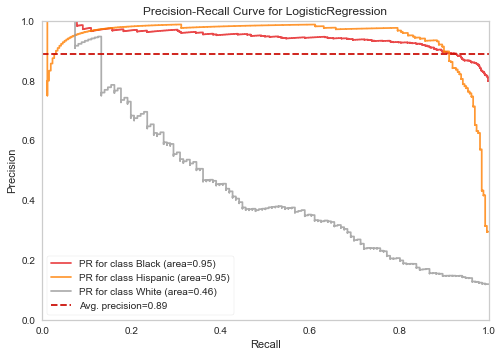

In [203]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## 2. Support Vector Machine (SVC Model)

### Vanilla  Bagging - LinearSVC model 

In [204]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

svc_model = LinearSVC(random_state=42)  
bag_svc_model = BaggingClassifier(
    svc_model, 
    n_jobs=-1, 
) 
# pipeline for SVC regression
pipe_bag_svc = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
]) 
pipe_bag_svc.fit(X_train , y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender'], dtype='object'))])),
                ('bag_svc',
                 BaggingClassifier(base_estimator=LinearSVC(random_state=42),
                                   n_jobs=-1))])

In [207]:
eval_metric(pipe_bag_svc, X_train, y_train, X_test, y_test)

Test_Set
[[736  11  11]
 [ 21 236   3]
 [ 84  18  34]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       758
           2       0.89      0.91      0.90       260
           3       0.71      0.25      0.37       136

    accuracy                           0.87      1154
   macro avg       0.82      0.71      0.73      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[2961   29   44]
 [  69  961    8]
 [ 322   72  149]]
              precision    recall  f1-score   support

           1       0.88      0.98      0.93      3034
           2       0.90      0.93      0.92      1038
           3       0.74      0.27      0.40       543

    accuracy                           0.88      4615
   macro avg       0.84      0.73      0.75      4615
weighted avg       0.87      0.88      0.86      4615



### Cross Validate Model

In [208]:
from sklearn.model_selection import cross_validate, cross_val_score

svc_model = LinearSVC(random_state=42)  
bag_svc_model = BaggingClassifier( 
    svc_model, 
    n_jobs=-1, 
) 
# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2           0.904406
test_precision_2    0.893083
test_recall_2       0.916179
dtype: float64

### SVC with Best Parameters (GridsearchCV)

In [211]:
from sklearn.model_selection import GridSearchCV

svc_model = SVC(probability=True, random_state=42)  # probability True to obtain ROC etc.
bag_svc_model = BaggingClassifier( # n_estimators*max_samples = data
    svc_model, 
    n_estimators=5,
    max_samples=.3,
    n_jobs=-1, 
) 

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
])


param_grid = {
    # BaggingClassifier
    'bag_svc__n_estimators': [10],
    # SVC
    'bag_svc__base_estimator__C': [0.1],
    'bag_svc__base_estimator__gamma': ["auto"],
    'bag_svc__base_estimator__kernel': ['rbf', 'poly'],
    'bag_svc__base_estimator__degree': [2],
    'bag_svc__base_estimator__class_weight': [None, 'balanced'],
}

f1_2 = make_scorer(f1_score, average = None, labels=[2])
svc_grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring=f1_2,
    n_jobs=-1,
    cv=5
) 
# grid_model.estimator.get_params().keys()

In [212]:
svc_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender'], dtype='object'))])),
                                       ('bag_svc',
                                        BaggingClassifier(base_estimator=SVC(probability=True,
                                                                             random_state=42),
                                                          max_samples=0.3,
                                                          n_estimators=5,
                                  

In [213]:
svc_grid_model.best_params_

{'bag_svc__base_estimator__C': 0.1,
 'bag_svc__base_estimator__class_weight': None,
 'bag_svc__base_estimator__degree': 2,
 'bag_svc__base_estimator__gamma': 'auto',
 'bag_svc__base_estimator__kernel': 'poly',
 'bag_svc__n_estimators': 10}

In [214]:
svc_grid_model.best_score_

0.8274276607504929

In [215]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[707  42   9]
 [ 27 218  15]
 [100  19  17]]
              precision    recall  f1-score   support

           1       0.85      0.93      0.89       758
           2       0.78      0.84      0.81       260
           3       0.41      0.12      0.19       136

    accuracy                           0.82      1154
   macro avg       0.68      0.63      0.63      1154
weighted avg       0.78      0.82      0.79      1154


Train_Set
[[2830  157   47]
 [ 106  882   50]
 [ 359   67  117]]
              precision    recall  f1-score   support

           1       0.86      0.93      0.89      3034
           2       0.80      0.85      0.82      1038
           3       0.55      0.22      0.31       543

    accuracy                           0.83      4615
   macro avg       0.73      0.67      0.68      4615
weighted avg       0.81      0.83      0.81      4615



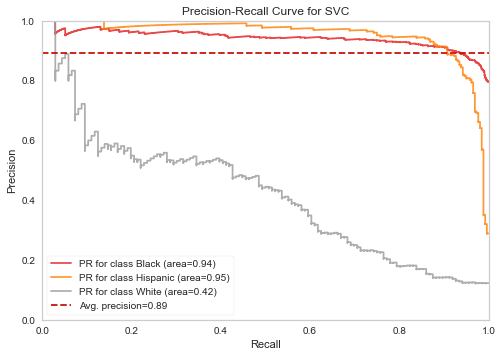

In [216]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# Tree-Based Models

- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [217]:
X = df.drop(columns=['dod_race'])
y = df['dod_race']

### Train | Test Split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [219]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pd.DataFrame(y_test).value_counts().sort_index()

0    758
1    260
2    136
dtype: int64

## 1. Implement Decision Tree Classifier Model
- Import the module
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla DT Model

In [220]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for DecisionTree Classifier
pipe_dt = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender'], dtype='object'))])),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [222]:
eval_metric(pipe_dt, X_train, y_train, X_test, y_test)

Test_Set
[[741   5  12]
 [  8 243   9]
 [ 16   3 117]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       758
           1       0.97      0.93      0.95       260
           2       0.85      0.86      0.85       136

    accuracy                           0.95      1154
   macro avg       0.93      0.92      0.93      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Cross Validate Model

In [223]:
from sklearn.model_selection import cross_validate, cross_val_score

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2           0.881608
test_precision_2    0.883506
test_recall_2       0.880275
dtype: float64

### DT with Best Parameters (GridsearchCV)

In [224]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])
param_grid = {
    "dt__splitter":["best", "random"],
    "dt__max_features":[None, "auto", "log2", 3, 4, 6, 7],
    "dt__max_depth": [None, 2, 3, 4, 5],
#     "dt__min_samples_leaf": [1, 3, 5, 7],
#     "dt__min_samples_split": [2, 5, 7, 9]
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=f1_2, 
    n_jobs=-1,
    cv=5,
)

In [225]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender'], dtype='object'))])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [None, 2, 3, 4, 5],
                         'dt__max_features': [None, 'auto', 'log2', 3, 4, 6, 7],
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, average=None, labels=

In [226]:
grid_model.best_params_

{'dt__max_depth': 5, 'dt__max_features': None, 'dt__splitter': 'best'}

In [227]:
grid_model.best_score_

0.9157247754875797

In [228]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[737   6  15]
 [ 11 246   3]
 [  4   2 130]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       758
           1       0.97      0.95      0.96       260
           2       0.88      0.96      0.92       136

    accuracy                           0.96      1154
   macro avg       0.94      0.96      0.95      1154
weighted avg       0.97      0.96      0.96      1154


Train_Set
[[2960   28   46]
 [  40  993    5]
 [  18   10  515]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3034
           1       0.96      0.96      0.96      1038
           2       0.91      0.95      0.93       543

    accuracy                           0.97      4615
   macro avg       0.95      0.96      0.96      4615
weighted avg       0.97      0.97      0.97      4615



## 3. Random Forest Classifier Model

- Import the module 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla RF Model

In [234]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline

rfc_model = RandomForestClassifier(random_state=42)

# pipeline for Random Forest Classifier
pipe_rfc = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])
pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender'], dtype='object'))])),
                ('rfc', RandomForestClassifier(random_state=42))])

In [236]:
eval_metric(pipe_dt, X_train, y_train, X_test, y_test)

Test_Set
[[741   5  12]
 [  8 243   9]
 [ 16   3 117]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       758
           1       0.97      0.93      0.95       260
           2       0.85      0.86      0.85       136

    accuracy                           0.95      1154
   macro avg       0.93      0.92      0.93      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Cross Validate Model

In [237]:
from sklearn.model_selection import cross_validate, cross_val_score

rfc_model = RandomForestClassifier(random_state=42)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2           0.723666
test_precision_2    0.811985
test_recall_2       0.653789
dtype: float64

### With Best Parameters (GridsearchCV)

In [238]:
from sklearn.model_selection import GridSearchCV

rfc_model = RandomForestClassifier(random_state=42)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])
param_grid = {
    'rfc__min_samples_split':[15,20],
    'rfc__max_depth':[5,9], # 5 le başla
    'rfc__n_estimators':[50],
    'rfc__criterion': ["entropy","gini"],
    'rfc__max_features':[None, 'auto', 50, 100],
    'rfc__max_leaf_nodes': [50, 100],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring=f1_2,
    refit=True,
    verbose=2,
    n_jobs=-1,
    cv=5,
)

In [239]:
%%time
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
CPU times: total: 2.98 s
Wall time: 28.1 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender'], dtype='object'))])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__criterion': ['entropy', 'gini'],
                         'rfc__max_depth': [5, 9],
                         'rfc__max_features': [None, 'auto', 50, 100],
                         'rfc__max_leaf_nodes': [50, 100],
                       

In [241]:
grid_model.best_params_

{'rfc__criterion': 'gini',
 'rfc__max_depth': 5,
 'rfc__max_features': None,
 'rfc__max_leaf_nodes': 50,
 'rfc__min_samples_split': 15,
 'rfc__n_estimators': 50}

In [242]:
grid_model.best_score_

0.9206197261220161

In [243]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[739   6  13]
 [ 11 246   3]
 [  4   2 130]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       758
           1       0.97      0.95      0.96       260
           2       0.89      0.96      0.92       136

    accuracy                           0.97      1154
   macro avg       0.95      0.96      0.95      1154
weighted avg       0.97      0.97      0.97      1154


Train_Set
[[2959   26   49]
 [  40  992    6]
 [  20   10  513]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3034
           1       0.96      0.96      0.96      1038
           2       0.90      0.94      0.92       543

    accuracy                           0.97      4615
   macro avg       0.95      0.96      0.95      4615
weighted avg       0.97      0.97      0.97      4615



## 4. Implement XGBoost Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

**I HAD A PROBLEM WITH INSTALLING XGBoost ON MY COMPUTER. I WILL COMPLETE THIS PART AS SOON AS I SOLVE THIS PROBLEM.**

# Final Words Before the Deployment :

- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.